# Table of contents:
## 1. Setup
## 2. Preprocessing
## 3. Elbow technique
## 4. kmeans clustering

# 1. Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl


In [2]:
#define path for data import
path = r"C:\Users\Anwender\Documents\10-2023 Happiness Project\02 Data\Prepared Data"

In [3]:
#hiding warnings from kmeans library
import warnings
warnings.filterwarnings('ignore')

In [4]:
#import df
df = pd.read_pickle(os.path.join(path, "df2015_2019_dropped.pkl"))

In [5]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


# 2. Preprocessing

In [6]:
#removing categorical columns
df_new = df.drop(columns = ["Country", "Region", "Happiness Rank", "Year"])
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
151,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
152,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
153,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
154,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [7]:
#standardizing values
df_std = StandardScaler().fit_transform(df_new)
df_std

array([[ 1.97978777,  1.20358409,  0.83006435, ...,  1.66770344,
         2.81928939,  0.64369274],
       [ 1.95662705,  0.97024727,  0.99050354, ...,  1.42721816,
         0.16995719,  1.78107218],
       [ 1.92633995,  1.02762152,  0.86375293, ...,  1.56190298,
         3.42648553,  1.00735742],
       ...,
       [-1.92546666, -1.38893435, -1.70345676, ..., -2.68174727,
        -0.93849226, -0.48765415],
       [-2.03236231, -2.1915793 , -3.27680772, ..., -1.21138892,
        -0.84330553,  0.14005669],
       [-2.23724564, -1.49793551, -1.5269493 , ..., -2.61639801,
        -0.31025985, -0.12896224]])

# 3. Elbow technique

In [8]:
# define potential range of clusters:
num_cl = range(1,10)
kmeans = [KMeans (n_clusters = i) for i in num_cl]

In [9]:
#apply kmeans algorithm:
score = [kmeans[i].fit(df_std).score(df_std) for i in range (len(kmeans))]

In [10]:
score

[-5341.000000000001,
 -3521.131802863057,
 -2665.175766719291,
 -2356.6384021369768,
 -2111.9066787491693,
 -1948.6437379241406,
 -1838.7942156169186,
 -1742.4751438103842,
 -1660.7584545201275]

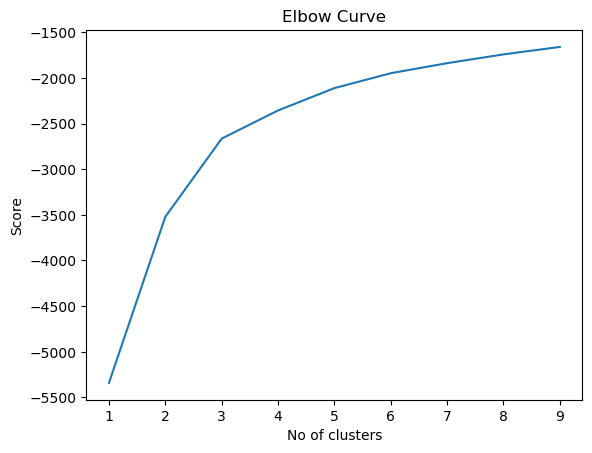

In [11]:
#visualize score
pl.plot (num_cl, score)
pl.xlabel ("No of clusters")
pl.ylabel ("Score")
pl.title ("Elbow Curve")
pl.show()

3 seems to be a good amount of clusters, as the curve begins to flatten right after. 4 could be an option as well.

# 4. kmeans clustering

In [12]:
#create kmeans object
kmeans = KMeans (n_clusters = 3)

In [13]:
#fit data
kmeans.fit(df_std)

KMeans(n_clusters=3)

In [14]:
#visualize clusters to df_std
#df_std["clusters"] = kmeans.fit_predict(df_std)
#df_std.head() 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [15]:
# adding clusters column to the original df, since adding it to the df_std didn't work due to its array nature.
df["clusters"] = kmeans.fit_predict(df_std)
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,clusters
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,2
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,2
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,2
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,2
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,2


In [16]:
df["clusters"].value_counts()

0    396
1    250
2    117
Name: clusters, dtype: int64

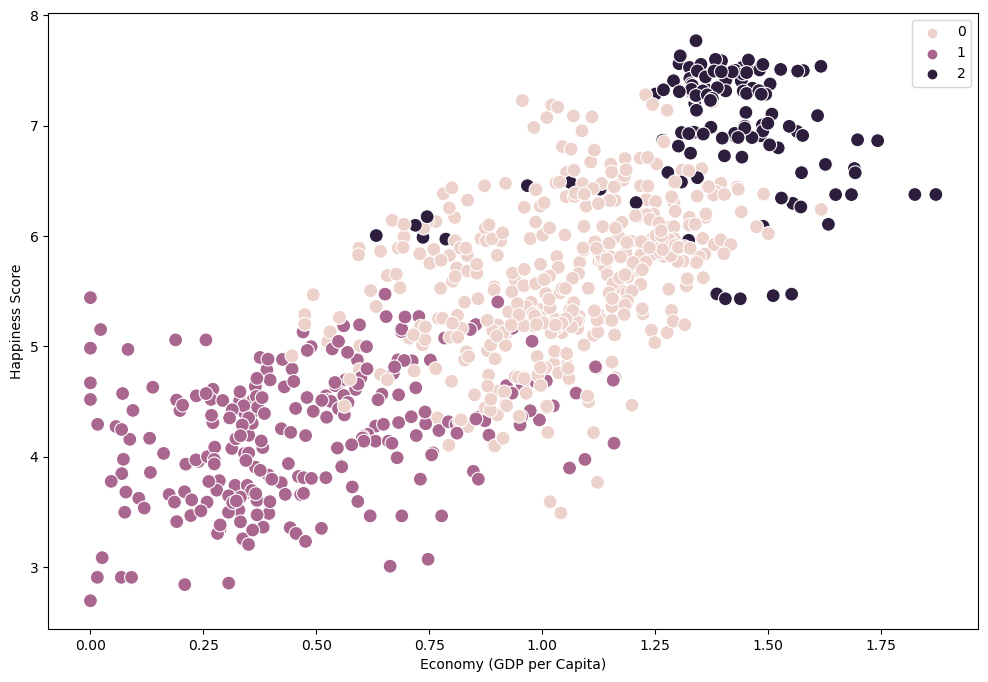

In [17]:
#create visualization for Economy x Happiness score
plt.figure(figsize = (12,8))
ax = sns.scatterplot (x = df["Economy (GDP per Capita)"], y = df["Happiness Score"], hue = kmeans.labels_, s = 100)
ax.grid(False)

### Interpretation:
The dark purple cluster shows that data points with higher Happiness scores are mostly those with the highest Economy scores as well. The pink cluster encompasses those with low Happiness scores and the lowest Economy scores, slightly overlapping with the data points of the purple cluster. The purple cluster indicates a middle ground between the dark purple and pink clusters, with data points between moderate Happiness scores and moderate Economy scores. These observations make sense in term that having financial stability also equals to being more content.

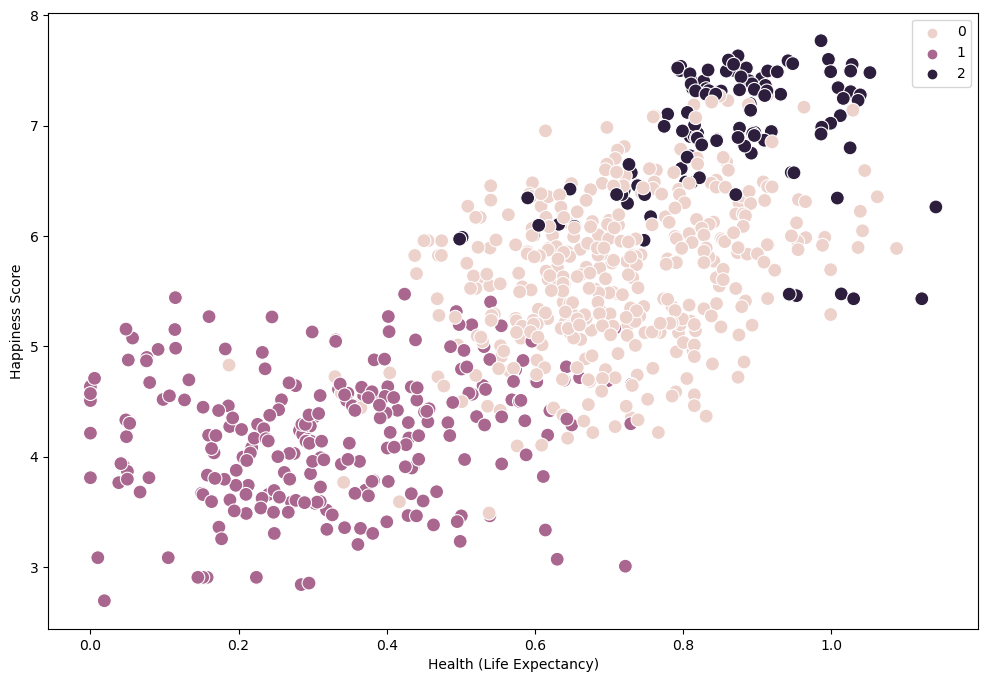

In [18]:
#create visualization for Health x Happiness score
plt.figure(figsize = (12,8))
ax = sns.scatterplot (x = df["Health (Life Expectancy)"], y = df["Happiness Score"], hue = kmeans.labels_, s = 100)
ax.grid(False)

### Interpretation
The dark purple cluster contains data points with the highest Happiness scores and the highest Health scores. The pink cluster contains the lowest Happiness scores and the majority of the lowest Health scores. This indicates that people might feel happier once the Healthcare system in a country reaches a certain standard. The purple cluster once again is a middle ground between the dark purple and the pink clusters, although some of its data points with Happiness score and Health score resemble those of the dark purple cluster. These observations make sense as well, since having the security of living a healthy life also ensure happiness.

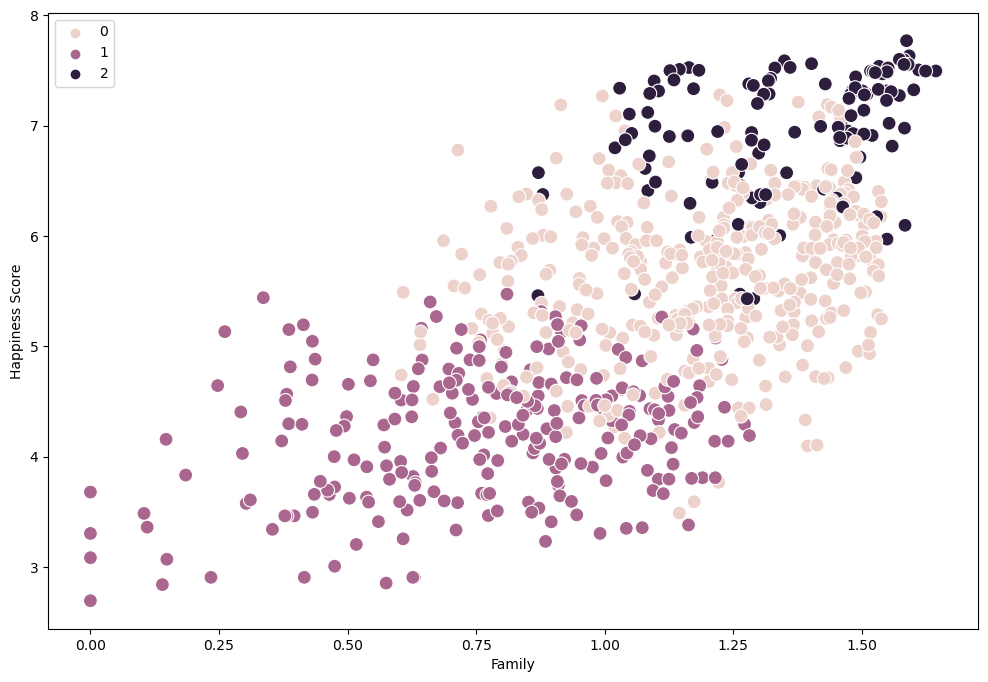

In [19]:
#create visualization for Family x Happiness score
plt.figure(figsize = (12,8))
ax = sns.scatterplot (x = df["Family"], y = df["Happiness Score"], hue = kmeans.labels_, s = 100)
ax.grid(False)

### Interpretation
Once again, the dark purple cluster contains the highest Happiness scores overlapping with the highest Family scores. The pink cluster contains the majority of data points with lower Happiness scores with the lowest Family scores, while the purple cluster is inbetween. This also makes sense, since a greater stability in the family leads to bigger happiness as well.

This leads me to the conclusion that the Happiest people might be those with the highest securities in those 3 terms: Economy, Health and Family.

In [20]:
# summary statistics
df_new.loc[df["clusters"] == 2, "cluster"] = "dark purple"
df_new.loc[df["clusters"] == 1, "cluster"] = "purple"
df_new.loc[df["clusters"] == 0, "cluster"] = "pink"

In [21]:
df_new.groupby("cluster").agg({"Happiness Score":["mean", "median"],
                              "Economy (GDP per Capita)":["mean", "median"],
                              "Health (Life Expectancy)": ["mean", "median"],
                              "Family": ["mean", "median"]})

Happiness Score        Economy (GDP per Capita)            \
                       mean median                     mean    median   
cluster                                                                 
dark purple        6.940641  6.994                 1.404150  1.425390   
pink               5.634199  5.685                 1.044464  1.053755   
purple             4.199692  4.262                 0.467775  0.427000   

            Health (Life Expectancy)              Family            
                                mean    median      mean    median  
cluster                                                             
dark purple                 0.859801  0.867330  1.350849  1.353814  
pink                        0.709878  0.703735  1.191014  1.223465  
purple                      0.334301  0.328712  0.767485  0.792365

The dark purple cluster contains the "best" overall values, having the highest values for all 4 variables that I looked at. The pink cluster is the group of data points with the lowest overall values, and the purple cluster contains datapoints on the middle ground. This shows the pattern of having higher overall Economy, Health and Family values leads to higher Happiness scores.

### Proposal:
These findings confirm my hypothesis of having overall highly rated values results in higher happiness score. I could try to transfer the grouping of data points to regression analysis of these different clusters and try to predict the Happiness scores once more.

# Bonus: Running regression on subgroups

In [23]:
df_new["cluster"].value_counts()

pink           396
purple         250
dark purple    117
Name: cluster, dtype: int64

In [24]:
# separating dark purple cluster as dataset to train model
dp_df = df_new.loc[df_new["cluster"] == "dark purple"]
dp_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,dark purple
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,dark purple
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,dark purple
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,dark purple
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,dark purple
...,...,...,...,...,...,...,...,...
20,6.825,1.50300,1.31000,0.82500,0.59800,0.18200,0.26200,dark purple
28,6.374,1.68400,1.31300,0.87100,0.55500,0.16700,0.22000,dark purple
33,6.262,1.57200,1.46300,1.14100,0.55600,0.45300,0.27100,dark purple
40,6.174,0.74500,1.52900,0.75600,0.63100,0.24000,0.32200,dark purple


In [26]:
#reshaping X and Y to array shapes
X = dp_df[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom"]].values.reshape(-1, 4)

In [27]:
X

array([[1.39651   , 1.34951   , 0.94143   , 0.66557   ],
       [1.30232   , 1.40223   , 0.94784   , 0.62877   ],
       [1.32548   , 1.36058   , 0.87464   , 0.64938   ],
       [1.459     , 1.33095   , 0.88521   , 0.66973   ],
       [1.32629   , 1.32261   , 0.90563   , 0.63297   ],
       [1.29025   , 1.31826   , 0.88911   , 0.64169   ],
       [1.32944   , 1.28017   , 0.89284   , 0.61576   ],
       [1.33171   , 1.28907   , 0.91087   , 0.6598    ],
       [1.25018   , 1.31967   , 0.90837   , 0.63938   ],
       [1.33358   , 1.30923   , 0.93156   , 0.65124   ],
       [1.33723   , 1.29704   , 0.89042   , 0.62433   ],
       [1.56391   , 1.21963   , 0.91894   , 0.61583   ],
       [1.33596   , 1.36948   , 0.89533   , 0.61777   ],
       [1.30782   , 1.28566   , 0.89667   , 0.5845    ],
       [1.42727   , 1.12575   , 0.80925   , 0.64157   ],
       [1.26637   , 1.28548   , 0.90943   , 0.59625   ],
       [1.52186   , 1.02      , 1.02525   , 0.54252   ],
       [1.32792   , 1.29937   ,

In [30]:
y = dp_df["Happiness Score"].values.reshape(-1, 1)

In [32]:
#import necessary libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
#create training and test sets for X and y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [34]:
#create regression object
regression = LinearRegression()

In [35]:
#fit train set to regression set
regression.fit(X_train, y_train)

LinearRegression()

In [36]:
#create y_predict using X_test
y_predict = regression.predict(X_test)

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [38]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.44176245 0.73908396 0.60824155 3.19083276]]
Mean squared error:  0.2634529871880126
R2 score:  0.26803399909477166


In [39]:
#creating dataframe for direct comparison
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})
compare.head(10)

,Actual,Predicted
0,7.200,7.039751
1,7.284,7.161390
2,5.430,6.829248
3,6.814,6.921424
4,7.364,7.157039
5,7.139,7.171341
6,5.960,6.346387
7,6.825,6.998754
8,6.411,5.802999
9,6.096,7.123153


## Testing pink cluster

In [41]:
# separating dark purple cluster as dataset to train model
p_df = df_new.loc[df_new["cluster"] == "pink"]
p_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,cluster
10,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,pink
11,7.226,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,pink
13,7.187,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,pink
15,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,pink
22,6.810,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,pink
...,...,...,...,...,...,...,...,...
124,4.456,0.56200,0.92800,0.72300,0.52700,0.14300,0.16600,pink
129,4.366,0.94900,1.26500,0.83100,0.47000,0.04700,0.24400,pink
132,4.332,0.82000,1.39000,0.73900,0.17800,0.01000,0.18700,pink
136,4.166,0.91300,1.03900,0.64400,0.24100,0.06700,0.07600,pink


In [42]:
#reshaping X and Y to array shapes
X = p_df[["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)", "Freedom"]].values.reshape(-1, 4)

In [43]:
y = p_df["Happiness Score"].values.reshape(-1, 1)

In [44]:
#create training and test sets for X and y:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [45]:
#create regression object
regression2 = LinearRegression()

In [46]:
#fit train set to regression set
regression2.fit(X_train, y_train)

LinearRegression()

In [47]:
#create y_predict using X_test
y_predict = regression2.predict(X_test)

In [48]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [49]:
# Print the model summary statistics.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.1101437  0.1207728  1.01800832 1.68256582]]
Mean squared error:  0.3516967292507986
R2 score:  0.3253332690075019


In [50]:
#creating dataframe for direct comparison
compare = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": y_predict.flatten()})
compare.head(10)

,Actual,Predicted
0,4.456,5.186034
1,6.253,5.448531
2,6.293,6.102127
3,4.800,5.592982
4,4.959,5.392085
5,5.467,4.955723
6,5.093,5.471745
7,4.949,4.885874
8,3.488,5.497566
9,6.149,5.770052
